# Anime Recommendation System - Naufal Hadi Darmawan

## Project Domain
### Background Problem
Anime has gained immense global popularity in recent years, with thousands of titles across various genres, formats, and demographics. However, due to the sheer volume of content, users often find it challenging to discover new anime that aligns with their preferences. Traditional methods like manual searches or general recommendations often fail to capture individual tastes, leading to a suboptimal viewing experience.
### Why and How Should This Problem be Solved?
A personalized recommendation system can bridge the gap by leveraging user preferences and anime attributes to provide tailored suggestions. By analyzing historical user data and anime metadata, such a system can enhance user satisfaction and engagement. Machine learning techniques, particularly content-based and collaborative filtering algorithms, can be employed to develop a robust recommendation system.
### Research Findings
Studies have demonstrated the effectiveness of recommendation systems in improving user satisfaction and interaction in entertainment platforms. Popular approaches include collaborative filtering, which leverages user interaction data, and content-based filtering, which relies on the attributes of items.
Link: 
- https://iopscience.iop.org/article/10.1088/1742-6596/1566/1/012057
- https://www.ijfmr.com/papers/2023/2/2372.pdf

## Business Understanding
### Problem Statements
- How can we help users discover anime that matches their preferences more effectively?
- How can we leverage anime metadata and user behavior data to create accurate recommendations?
### Goals
- Develop a content-based recommendation algorithm that analyzes anime attributes to suggest similar titles. The algorithm aims to achieve a precision of at least 90% precision, ensuring relevant and satisfying recommendations based on anime content.

- Build a collaborative filtering algorithm that utilizes user ratings and preferences to recommend anime. The algorithm targets a mean absolute error (MAE) below 0.8, guaranteeing personalized and accurate recommendations for users while minimizing prediction errors in user satisfaction.

### Solution Statements
- Content-Based Algorithm  
Leverages anime metadata such as genres, studios, scores, etc to recommend titles similar to those a user has enjoyed.

- Collaborative Filtering Algorithm  
Uses user interaction data, such as ratings, to identify patterns and recommend titles based on the preferences of similar users.

## Data Understanding
### Dataset Overview
#### Anime Metadata Dataset
The dataset offers valuable information for analyzing and comprehending the characteristics, ratings, popularity, and viewership of various anime shows.  
- anime_id: Unique ID for each anime.
- Name: The name of the anime in its original language.
- English name: The English name of the anime.
- Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).
- Score: The score or rating given to the anime.
- Genres: The genres of the anime, separated by commas.
- Synopsis: A brief description or summary of the anime's plot.
- Type: The type of the anime (e.g., TV series, movie, OVA, etc.).
- Episodes: The number of episodes in the anime.
- Aired: The dates when the anime was aired.
- Premiered: The season and year when the anime premiered.
- Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
- Producers: The production companies or producers of the anime.
- Licensors: The licensors of the anime (e.g., streaming platforms).
- Studios: The animation studios that worked on the anime.
- Source: The source material of the anime (e.g., manga, light novel, original).
- Duration: The duration of each episode.
- Rating: The age rating of the anime.
- Rank: The rank of the anime based on popularity or other criteria.
- Popularity: The popularity rank of the anime.
- Favorites: The number of times the anime was marked as a favorite by users.
- Scored By: The number of users who scored the anime.
- Members: The number of members who have added the anime to their list on the platform.
- Image URL: The URL of the anime's image or poster.

- **Number of Rows**: 24905 
- **Number of Columns**: 24
#### User Ratings Dataset
The User Score Dataset enables various analyses and insights into user interactions with anime. By examining user ratings for different anime titles, you can identify highly-rated and popular anime among users. Additionally, you can explore user preferences and watch patterns for specific anime titles. This dataset also forms the foundation for building recommendation systems based on user ratings, helping to suggest anime that align with individual tastes.  
- user_id: Unique ID for each user.
- Username: The username of the user.
- anime_id: Unique ID for each anime.
- Anime Title: The title of the anime.
- rating: The rating given by the user to the anime.

- Number of Rows: 24325191
- Number of Columns: 5
### Data Condition
The dataset is relatively clean, with the exception of a few data quality issues. The 'Score' column, which should be numeric, contained non-numeric values like 'unknown'. These values were replaced with 0 and the column was converted to numeric. The 'Genres' column, originally a single string of genres, was transformed into a list of genres for more efficient analysis.

### Exploratory Data Analysis

In this section, I will conduct a comprehensive Exploratory Data Analysis (EDA) to gain valuable insights into the dataset.

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten


#### Data Loading

I will load the dataset into a suitable data structure, such as a Pandas DataFrame, ensuring it is accessible for analysis.

In [2]:
anime = pd.read_csv('/kaggle/input/myanimelist-dataset/anime-dataset-2023.csv')
user_rating = pd.read_csv('/kaggle/input/myanimelist-dataset/users-score-2023.csv')

# Check the number of rows and columns for the anime dataset
print("Anime Dataset:")
print(f"Rows and Columns: {anime.shape}")

# Check the number of rows and columns for the user rating dataset
print("\nUser Rating Dataset:")
print(f"Rows and Columns: {user_rating.shape}")


Anime Dataset:
Rows and Columns: (24905, 24)

User Rating Dataset:
Rows and Columns: (24325191, 5)


In [3]:
print("Anime Dataset")
anime.head()

Anime Dataset


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [4]:
print("User Rating Dataset")
user_rating.head()

User Rating Dataset


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


#### Drop Feature that less relevant

- **Anime Dataset**  
For content-based filtering, I'll use features that describe the content of the anime. These features help calculate the similarity between items (anime) based on their attributes.  
**Features to Use**
    - anime_id: A unique identifier for each anime.
    - Name: The official title of the anime.
    - Genres: Describes the type of anime (e.g., Action, Romance). Use this for calculating similarity.
    - Synopsis: Provides a detailed description of the anime's plot.
    - Type: Indicates the format of the anime (e.g., TV, Movie, OVA).
    - Score: Represents the anime's overall rating and popularity.
    - Studios: Information about the production studio, which can influence style and quality.
    - Source: Highlights the origin of the story (e.g., Manga, Light Novel, Original).
    - Popularity: Indicates how widely the anime is recognized.

In [5]:
# Columns to retain
useful_features = ['anime_id', 'Name', 'Genres', 'Synopsis', 'Type', 'Score', 'Studios', 'Source', 'Popularity']

# Filter dataset to keep only the useful features
anime_filtered = anime[useful_features]

# Convert Score to numeric
anime_filtered['Score'] = pd.to_numeric(anime_filtered['Score'], errors='coerce')

# Parse Genres
anime_filtered['Genre_List'] = anime_filtered['Genres'].str.split(', ')
anime_filtered.drop(columns=['Genres'], inplace=True)

anime_filtered.head()

/tmp/ipykernel_23/3141747454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_filtered['Score'] = pd.to_numeric(anime_filtered['Score'], errors='coerce')
/tmp/ipykernel_23/3141747454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_filtered['Genre_List'] = anime_filtered['Genres'].str.split(', ')
/tmp/ipykernel_23/3141747454.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,anime_id,Name,Synopsis,Type,Score,Studios,Source,Popularity,Genre_List
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",TV,8.75,Sunrise,Original,43,"[Action, Award Winning, Sci-Fi]"
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",Movie,8.38,Bones,Original,602,"[Action, Sci-Fi]"
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",TV,8.22,Madhouse,Manga,246,"[Action, Adventure, Sci-Fi]"
3,7,Witch Hunter Robin,Robin Sena is a powerful craft user drafted in...,TV,7.25,Sunrise,Original,1795,"[Action, Drama, Mystery, Supernatural]"
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,TV,6.94,Toei Animation,Manga,5126,"[Adventure, Fantasy, Supernatural]"


- **User Rating Dataset**  
For collaborative filtering I only need the user_id, anime_id, and rating columns. The other columns, Username and Anime Title, are not directly required for collaborative filtering models as they are identifiers or metadata.  
**Features to Use**
    - user_id: Identifies the user in the interaction matrix.
    - anime_id: Identifies the anime in the interaction matrix.
    - rating: Represents the user's preference for the anime (used to predict ratings).

In [6]:
user_rating_filtered = user_rating.drop(columns=["Username", "Anime Title"])
user_rating_filtered.head()

,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8


#### Initial Inspection
In this section I perform initial inspection to find out general information using **info()** and descriptive statistics using **describe()** on the dataset.

In [7]:
print("Anime Data Information:")
print(anime_filtered.info())

Anime Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    24905 non-null  int64  
 1   Name        24905 non-null  object 
 2   Synopsis    24905 non-null  object 
 3   Type        24905 non-null  object 
 4   Score       15692 non-null  float64
 5   Studios     24905 non-null  object 
 6   Source      24905 non-null  object 
 7   Popularity  24905 non-null  int64  
 8   Genre_List  24905 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.7+ MB
None


In [8]:
print("Anime Data Descriptive Statistics:")
print(anime_filtered.describe())

Anime Data Descriptive Statistics:
           anime_id         Score    Popularity
count  24905.000000  15692.000000  24905.000000
mean   29776.709014      6.380890  12265.388356
std    17976.076290      0.928696   7187.428393
min        1.000000      1.850000      0.000000
25%    10507.000000      5.730000   6040.000000
50%    34628.000000      6.390000  12265.000000
75%    45240.000000      7.060000  18491.000000
max    55735.000000      9.100000  24723.000000


In [9]:
print("Missing Values:")
print(anime_filtered.isnull().sum())

Missing Values:
anime_id         0
Name             0
Synopsis         0
Type             0
Score         9213
Studios          0
Source           0
Popularity       0
Genre_List       0
dtype: int64


Given that nearly 37% of the rows (9,213) are missing Score, dropping them may significantly reduce my dataset size, which could impact the robustness of my analysis or model. so we should Filling missing scores with **0** instead of dropping them.

In [10]:
anime_filtered['Score'] = anime_filtered['Score'].fillna(0)


/tmp/ipykernel_23/3307978456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_filtered['Score'] = anime_filtered['Score'].fillna(0)


In [11]:
print("Anime Data Information:")
print(anime_filtered.info())
print("Missing Values:")
print(anime_filtered.isnull().sum())

Anime Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    24905 non-null  int64  
 1   Name        24905 non-null  object 
 2   Synopsis    24905 non-null  object 
 3   Type        24905 non-null  object 
 4   Score       24905 non-null  float64
 5   Studios     24905 non-null  object 
 6   Source      24905 non-null  object 
 7   Popularity  24905 non-null  int64  
 8   Genre_List  24905 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.7+ MB
None
Missing Values:
anime_id      0
Name          0
Synopsis      0
Type          0
Score         0
Studios       0
Source        0
Popularity    0
Genre_List    0
dtype: int64


In [12]:
print("User Data Information:")
print(user_rating_filtered.info())

User Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 556.8 MB
None


In [13]:
print("User Rating Data Descriptive Statistics:")
print(user_rating.describe())

User Rating Data Descriptive Statistics:
            user_id      anime_id        rating
count  2.432519e+07  2.432519e+07  2.432519e+07
mean   4.403843e+05  9.754686e+03  7.622930e+00
std    3.669469e+05  1.206196e+04  1.661510e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    9.718800e+04  8.730000e+02  7.000000e+00
50%    3.879780e+05  4.726000e+03  8.000000e+00
75%    5.280430e+05  1.316100e+04  9.000000e+00
max    1.291097e+06  5.608500e+04  1.000000e+01


In [14]:
print("Missing Values:")
print(user_rating_filtered.isnull().sum())

Missing Values:
user_id     0
anime_id    0
rating      0
dtype: int64


#### Univariate Analysis:
Univariate analysis focuses on analyzing one variable at a time. Let’s perform it for key columns in both user_rating_filtered and anime_filtered.

**anime_filtered:**

- Score Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


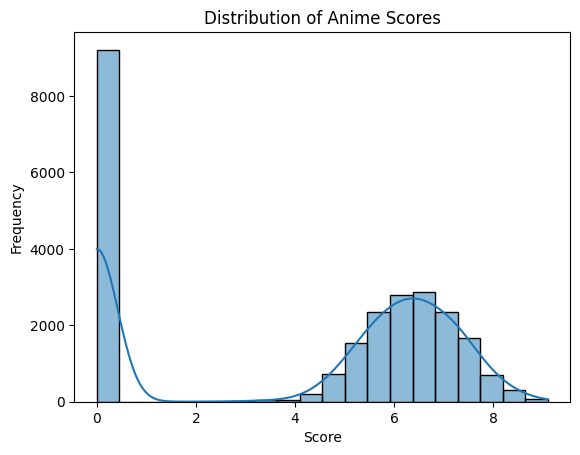

In [15]:
sns.histplot(anime_filtered['Score'], kde=True, bins=20)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


The distribution of anime scores is skewed to the right, with a peak around 6-7. This indicates that a significant portion of anime titles receive relatively high ratings. The presence of a long tail towards lower scores suggests a substantial number of anime with lower ratings or those that are unrated (represented by a score of 0). Overall, the distribution suggests a diverse range of anime quality preferences among viewers.

- Anime Type Distribution

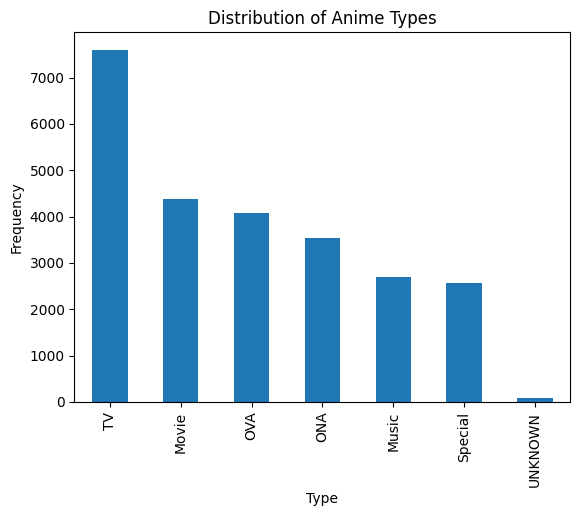

In [16]:
anime_filtered['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()


The bar chart illustrates the distribution of anime types within the dataset. TV series are the most prevalent type, followed by movies and OVAs. ONA, music videos, specials, and unknown types constitute a smaller proportion of the dataset. This visualization provides a clear overview of the different anime formats present and their relative frequencies.

- Genre Frequency: Extract individual genres and count their occurrences.

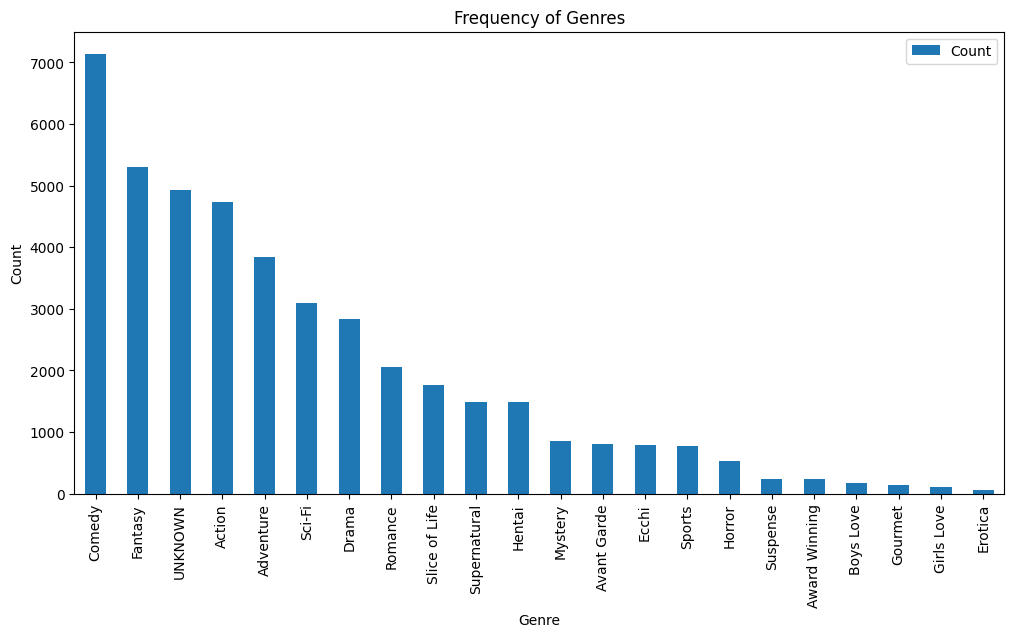

In [17]:
from collections import Counter
genre_counts = Counter([genre for sublist in anime_filtered['Genre_List'] for genre in sublist])
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])
genre_df.sort_values('Count', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


The bar chart presents the frequency distribution of various anime genres. Comedy is the most prevalent genre, followed by Fantasy and UNKNOWN. Genres like Action, Adventure, and Sci-Fi also have a significant presence. On the other hand, genres like Erotica, Gourmet, and Girls Love are less common. This visualization provides insights into the popularity and diversity of anime genres within the dataset.

**user_rating_filtered:**

- Rating Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


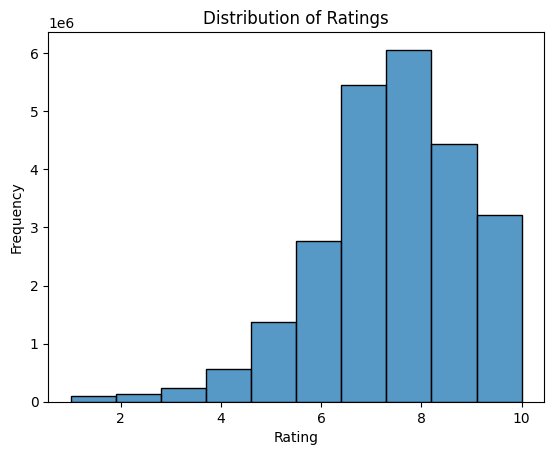

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(user_rating_filtered['rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


The histogram displays the distribution of user ratings for anime. The majority of ratings cluster around 7-8, indicating that a significant number of users tend to give higher ratings. There is a gradual decrease in frequency as the ratings move towards lower scores, with fewer users giving ratings below 5. This suggests that users generally have positive opinions about anime and are more likely to rate them positively.

#### Multivariate Analysis:
Multivariate analysis examines relationships between variables. For this dataset, we'll analyze interactions between variables like ratings, popularity, and scores.

- Correlation Analysis  
Analyze the relationships between numeric features (Score, Popularity, and rating).

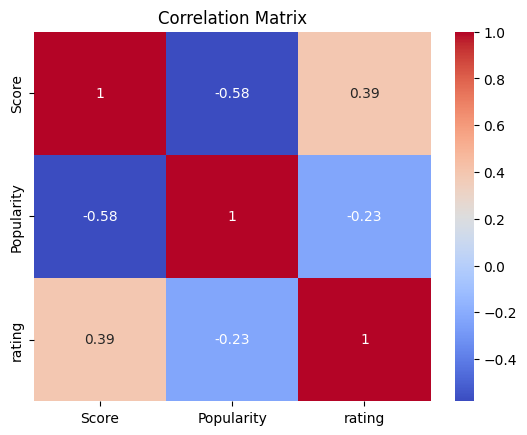

In [19]:
combined_df = user_rating_filtered.merge(anime_filtered, on='anime_id')
correlation_matrix = combined_df[['Score', 'Popularity', 'rating']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix reveals insights into the relationships between the variables 'Score', 'Popularity', and 'Rating'. A strong negative correlation exists between 'Score' and 'Popularity', suggesting that as popularity increases, the average score tends to decrease. Conversely, a moderate positive correlation is observed between 'Score' and 'Rating', indicating that higher ratings are associated with higher scores. The correlation between 'Popularity' and 'Rating' is weak and negative, suggesting a minimal relationship between these two variables.

- Score vs. Popularity  
Examine how Score relates to Popularity.

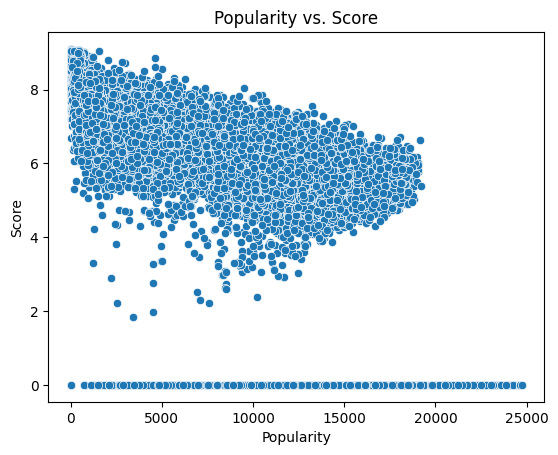

In [20]:
sns.scatterplot(data=anime_filtered, x='Popularity', y='Score')
plt.title('Popularity vs. Score')
plt.xlabel('Popularity')
plt.ylabel('Score')
plt.show()


The scatter plot illustrates the relationship between popularity and score. There is a clear negative trend, indicating that as popularity increases, the average score tends to decrease. This suggests that highly popular anime often receive lower average scores compared to less popular ones. However, there is also a significant amount of scatter, indicating that popularity is not the sole determinant of an anime's score.

- Rating vs. Anime Type  
Analyze whether different anime types have different average ratings.

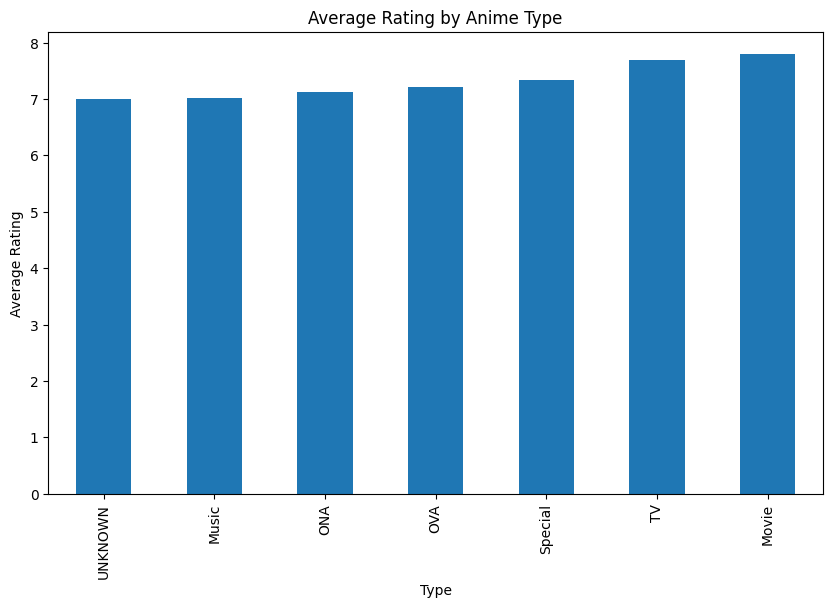

In [21]:
average_rating_per_type = combined_df.groupby('Type')['rating'].mean().sort_values()
average_rating_per_type.plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()


The bar chart presents the average rating for each anime type. Movies have the highest average rating, followed by TV series. Types like UNKNOWN and Music tend to have lower average ratings. This visualization suggests that movie and TV anime are generally perceived as having higher quality compared to other formats.

- Studios by Average Rating

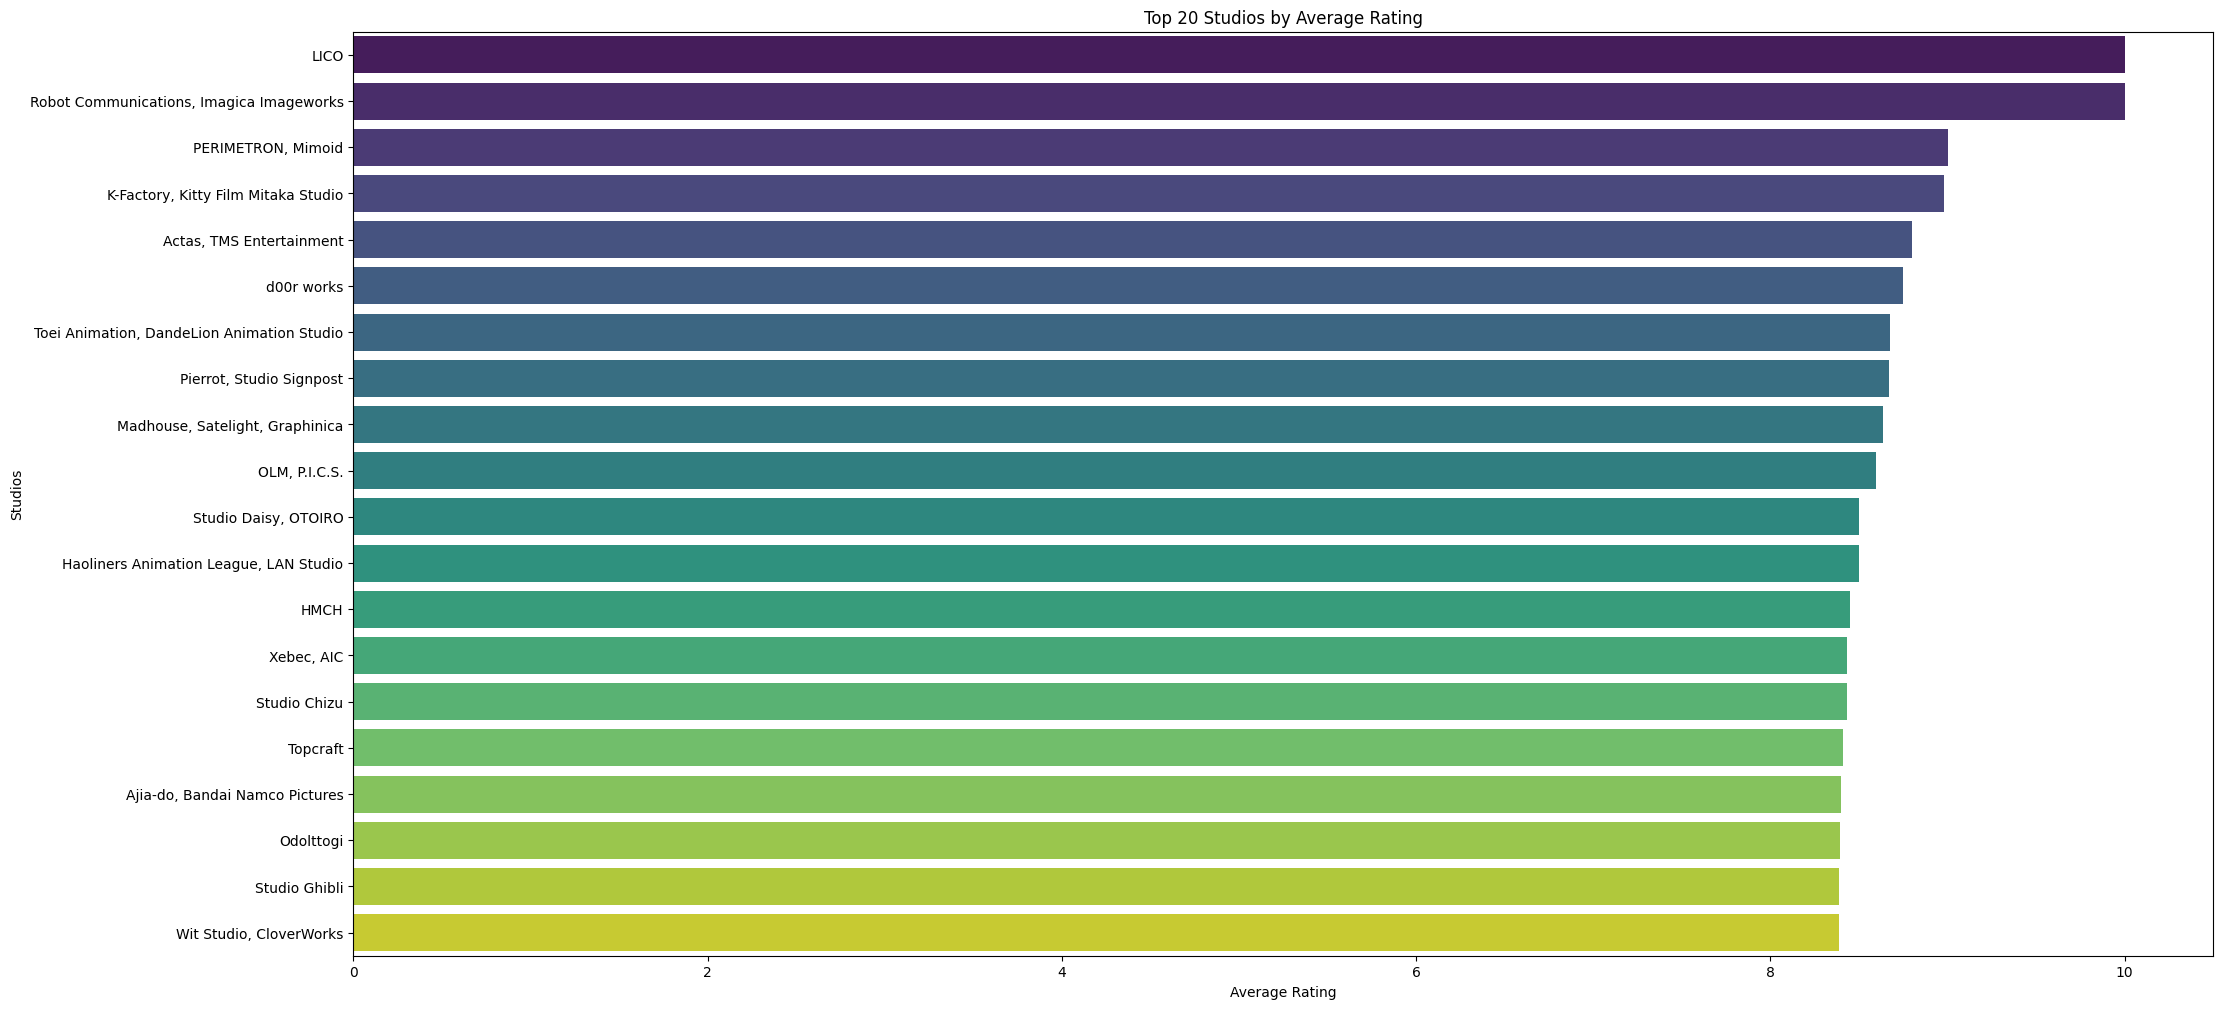

In [22]:
# Group by Studios and calculate the average rating
studio_avg_rating = combined_df.groupby('Studios')['rating'].mean().sort_values(ascending=False)

# Select top 10 studios by average rating
top_studios = studio_avg_rating.head(20)

# Plot the top 10 studios
plt.figure(figsize=(24, 12))
sns.barplot(x=top_studios.values, y=top_studios.index, palette="viridis")
plt.title('Top 20 Studios by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Studios')
plt.show()

The studios are ranked based on their average rating, with Robot Communications and Imagica Imageworks having the highest average rating, followed by UCOS, PERIMETRON, and Mimoid. The list includes a variety of animation and entertainment studios, with some well-known names like Studio Ghibli and Wit Studio, CloverWorks. The data provides a clear visual representation of the relative performance of these studios according to their average ratings.

## Data Preparation

### Preparation for Content-Based Filtering

#### Text Vectorization (for 'Synopsis')

Text vectorization is crucial for transforming textual data into numerical representations that machine learning models can understand. By applying TF-IDF vectorization, we can convert the textual synopses into a matrix of TF-IDF scores, capturing the importance of each word within the context of the entire dataset. This representation allows us to effectively analyze and compare anime synopses, enabling tasks like clustering, classification, or recommendation systems. Additionally, limiting the number of features to 500 helps reduce dimensionality and computational complexity, while still capturing the most relevant information.

In [23]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
anime_filtered['Synopsis'] = anime_filtered['Synopsis'].fillna('')

/tmp/ipykernel_23/3446361343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_filtered['Synopsis'] = anime_filtered['Synopsis'].fillna('')


In [24]:
# Vectorizing the Synopsis and Name columns
synopsis_tfidf = tfidf_vectorizer.fit_transform(anime_filtered['Synopsis']).toarray()

In [25]:
synopsis_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Categorical Encoding (for 'Type', 'Studios', 'Source', 'Genre_List')

Categorical encoding is essential for transforming categorical variables into numerical representations that machine learning models can process. One-hot encoding is a popular technique for handling nominal categorical variables like 'Type', 'Studios', and 'Source'. It creates binary features for each category, allowing the model to understand the significance of each category. Similarly, for the 'Genre_List' column, we create binary features for each genre, indicating its presence or absence in each anime. By converting these categorical variables into numerical features, we enable the model to capture the underlying patterns and relationships within the data and make accurate predictions.

In [26]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_columns = ['Type', 'Studios', 'Source']

# One-hot encoding for 'Type', 'Studios', and 'Source'
encoded_categories = encoder.fit_transform(anime_filtered[categorical_columns])

# Create binary genre features
anime_filtered['Genre_List'] = anime_filtered['Genre_List'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Use explode to split genres into separate rows
genre_list = anime_filtered.explode('Genre_List')['Genre_List'].value_counts().index

# Create binary features for each genre
for genre in genre_list:
    anime_filtered[genre] = anime_filtered['Genre_List'].apply(lambda x: 1 if genre in x else 0)

# Combine all binary genre columns
genre_features = anime_filtered[genre_list].values

/tmp/ipykernel_23/1355806012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_filtered['Genre_List'] = anime_filtered['Genre_List'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
/tmp/ipykernel_23/1355806012.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_filtered[genre] = anime_filtered['Genre_List'].apply(lambda x: 1 if genre in x else 0)
/tmp/ipykernel_23/1355806012.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

#### Numerical Normalization (for 'Score' and 'Popularity')

Numerical normalization is crucial for ensuring that features with different scales contribute equally to the model's learning process. Standard scaling is a common technique that transforms numerical features to have zero mean and unit variance. By standardizing the 'Score' and 'Popularity' features, we ensure that they are on the same scale, preventing features with larger magnitudes from dominating the model's decisions. This normalization step improves the model's ability to learn complex patterns and relationships within the data, leading to more accurate predictions.

In [27]:
scaler = StandardScaler()
numerical_features = anime_filtered[['Score', 'Popularity']]

# Normalize the numerical features
numerical_scaled = scaler.fit_transform(numerical_features)

#### Combine All Features

Combining all features: text (e.g., synopsis TF-IDF), categorical (e.g., encoded categories), genre, and numerical features into a single feature matrix is essential because it enables the recommendation model to leverage all available information about the anime. Each feature type captures different aspects: text features provide context from the synopsis, categorical and genre features encode descriptive metadata, and numerical features (like scores) add quantitative insights. By integrating these diverse feature sets, the model can analyze a richer, more holistic representation of the data, leading to more accurate and meaningful recommendations. Converting to a dense array ensures compatibility with algorithms that require dense input formats.

In [28]:
from scipy.sparse import csr_matrix, hstack

# Ensure the categorical encoding is a sparse matrix (for memory efficiency)
encoded_categories_sparse = csr_matrix(encoded_categories)

# Ensure the genre features are a sparse matrix (if they are binary, they are sparse by nature)
genre_features_sparse = csr_matrix(genre_features)

# Combine all features (Text, Categorical, Genre, and Numerical)
final_features = hstack([synopsis_tfidf, encoded_categories_sparse, genre_features_sparse, numerical_scaled])

# convert everything to a dense array 
final_features = final_features.toarray()

final_features


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.49312516, -1.70055729],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.37631606, -1.62278104],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.32580402, -1.67231296],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.26925228, -1.70654008],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.26925228, -1.70654008],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.26925228, -1.70654008]])

### Preparation for Collaborative Filtering

#### Encode user_id and anime_id

Encoding user IDs and anime IDs is essential for collaborative filtering models to effectively capture user-item interactions. By assigning unique integer indices to each user and anime, we create a numerical representation that the model can process. This encoding enables the model to learn latent factors and preferences associated with specific users and items.

In [29]:
user_lookup = tf.keras.layers.IntegerLookup()
anime_lookup = tf.keras.layers.IntegerLookup()

user_lookup.adapt(user_rating_filtered['user_id'])
anime_lookup.adapt(user_rating_filtered['anime_id'])

user_ratings_encoded = user_rating_filtered.copy()
user_ratings_encoded['user_id'] = user_lookup(user_rating_filtered['user_id'])
user_ratings_encoded['anime_id'] = anime_lookup(user_rating_filtered['anime_id'])

#### Normalize ratings

Normalizing the rating data is an important step when using collaborative filtering techniques for recommender systems. By dividing the ratings by 10 to scale them between 0 and 1, you're effectively accounting for differences in how individual users rate items. Some users may be more generous with high ratings, while others may be more conservative. Normalizing the ratings helps to remove this user-specific bias, allowing the collaborative filtering algorithm to better identify similarities between users and make more accurate predictions. 

This is crucial because collaborative filtering relies on finding patterns in how users rate items relative to each other, rather than just the raw rating values.

In [30]:
user_ratings_encoded['rating'] = user_ratings_encoded['rating'] / 10.0

#### Split the data

Splitting the data into training, validation, and test sets is crucial for building robust and reliable collaborative filtering models. The training set is used to train the model, the validation set is used to tune hyperparameters and prevent overfitting, and the test set is used to evaluate the  final model's performance on unseen data. By splitting the data in this way, we ensure that the model is not biased towards the training data and can generalize well to new, unseen data. The specific split ratios (80%, 10%, 10%) are common and provide a good balance between training, validation, and testing.

In [31]:
from sklearn.model_selection import train_test_split

train, temp = train_test_split(user_ratings_encoded, test_size=0.2, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

#### Convert to TensorFlow datasets

I should convert the data into TensorFlow datasets because they provide a flexible and efficient way to handle data inputs for training, validation, and testing of my machine learning models, particularly for deep learning. By creating TensorFlow datasets, I can easily shuffle the data to introduce randomness and prevent overfitting, batch the data to optimize memory usage and processing speed during training, and prefetch the data to keep the model pipeline filled and maximize GPU utilization.

These features make the training process more efficient and robust, as the model can learn from the data in small, manageable batches without having to load the entire dataset into memory at once. This is particularly important for large or high-dimensional datasets, where memory constraints can become a bottleneck. By leveraging the flexibility and performance optimizations offered by TensorFlow datasets, I can streamline my machine learning workflows and improve the overall effectiveness of my models.

In [32]:
def create_tf_dataset(data):
    return tf.data.Dataset.from_tensor_slices((
        {"user_id": data['user_id'].values, "anime_id": data['anime_id'].values},
        data['rating'].values
    ))

In [33]:
train_ds = create_tf_dataset(train).shuffle(100_000).batch(256).prefetch(tf.data.AUTOTUNE)
val_ds = create_tf_dataset(val).batch(256).prefetch(tf.data.AUTOTUNE)
test_ds = create_tf_dataset(test).batch(256).prefetch(tf.data.AUTOTUNE)

## Modeling

### Content-Based Filtering

Content-based recommendation systems use the features of the items (in this case, anime) to suggest similar items to users. The similarity is computed based on various attributes such as genres, synopsis (text features), categories (e.g., type, source), and numerical features like scores and popularity.

**How it works:**
- Similarity Computation: Cosine similarity is calculated between all anime vectors in the final_features matrix. This measures the angle between vectors, where a smaller angle indicates higher similarity.
- Recommendation Generation: For a given anime (input query), the algorithm retrieves other anime with the highest similarity scores, recommending them to the user.

**Advantages of Content-Based Recommendation Systems**
- The system can recommend items specific to a user's preferences based solely on the item they like.
- Since the system relies on item attributes, it can recommend items even without historical user interaction data.
- Recommendations are explainable because they are based on specific item attributes (e.g., "similar genre" or "similar synopsis").

**Disadvantages of Content-Based Recommendation Systems**
- New items with insufficient or no attributes/features may not be well-represented in recommendations.
- Recommendations can become too narrow, suggesting only items very similar to the ones the user already likes (known as the "serendipity problem").
- The system's performance heavily relies on the quality and representation of the extracted features. Poor feature engineering can lead to suboptimal results.

In [34]:
cosine_sim = cosine_similarity(final_features)

In [35]:
# import joblib

# # Save the cosine similarity matrix as a file
# joblib.dump(cosine_sim, 'CB_Model.pkl')


In [36]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_filtered['Name'], columns=anime_filtered['Name'])
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (24905, 24905)


Name,Imokawa Mukuzo: Genkanban no Maki,Juusenshi Gulkeeva,Hua Jianghu: Bu Liang Ren IV,Lost Utopia,Gintama: Monster Strike-hen,Yajikita Gakuen Douchuuki,Choujuu Giga,Hametarou,Koume-chan ga Iku!,RD Sennou Chousashitsu
Name,,,,,,,,,,
Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie,0.264118,0.274418,0.077870,0.182517,0.570386,0.249386,0.119318,-0.196820,0.363538,0.306682
Sonyeon 007 Jihajeguk,0.090588,-0.018034,-0.065454,0.245008,-0.145958,0.049939,-0.157251,0.406618,-0.094075,-0.019988
Youkai Watch: Best 10,0.236310,0.050909,0.064760,0.175918,0.194560,0.038901,0.045221,0.068311,0.184488,0.042653
Fanqie Jiang,0.093013,0.093346,0.095924,-0.041250,-0.316371,-0.108031,-0.182696,0.571992,0.026855,-0.104294
Majutsushi Orphen,0.200495,0.485183,0.118410,0.280055,0.465629,0.360008,0.148916,-0.230062,0.299237,0.481021
Saki Picture Drama,0.234409,0.093956,0.030228,0.023043,0.440740,0.229727,0.097947,-0.024087,0.484621,0.170702
Puchitto Gargantia: Marumaru no Gargantia,0.426842,0.236894,0.175184,0.020967,0.285127,0.056335,0.087117,0.144299,0.196723,0.553813
Oniichan dakedo Ai sae Areba Kankeinai yo ne!,0.189697,0.248120,0.085199,0.027556,0.375924,0.069355,0.267280,-0.218882,0.414469,0.391937
Hen (Music),0.254697,-0.041965,0.101401,-0.007461,-0.342118,-0.107417,-0.184576,0.695030,-0.098140,-0.234231


### Collaborative Filtering

Collaborative filtering focuses on user-item interactions to generate recommendations. It predicts a user's preferences based on their past interactions and the interactions of similar users or items. In my implementation, I use matrix factorization with embeddings to model these interactions.

Here's a breakdown of the algorithm:
- User and Item Embeddings:  
Each user (user_id) and anime (anime_id) is represented as a learned embedding vector of fixed size (embedding_dim).
These embeddings capture latent features that represent preferences (for users) or characteristics (for anime).
- Embedding Combination:  
The user and anime embeddings are concatenated to form a single feature vector representing the interaction between the user and the anime.
- Feedforward Network:  
This concatenated vector is passed through dense layers with dropout regularization to predict the rating. The layers learn complex, non-linear relationships between the user and anime embeddings.
- Output Layer:  
The output layer has a single neuron that predicts a scalar value (the rating).
- Training:  
The model is trained on known user-anime ratings to minimize the error (e.g., mean squared error). Metrics like mean absolute error (MAE) and root mean squared error (RMSE) are used to evaluate performance.
- Prediction:  
For unseen user-anime pairs, the model predicts ratings based on learned embeddings and feedforward layers.

**Advantages of Collaborative Filtering**
- Personalized Recommendations:
    - It uses actual user behavior (ratings or interactions), resulting in highly personalized recommendations.
- Domain Independence:
    - Unlike content-based systems, it does not require domain-specific features (e.g., synopsis, genres). It solely relies on the interaction matrix.
- Serendipity:
    - Can recommend items a user might not have explicitly searched for but would enjoy based on similar users/items.

**Disadvantages of Collaborative Filtering**
- Cold Start Problem:
    - Struggles with new users or items due to a lack of historical interaction data.
    - This is especially challenging in sparse datasets where most users or items have limited ratings.
- Scalability:
    - Requires substantial computational resources for large datasets. In your case, with over 24 million user-anime interactions, training the model and computing predictions can be computationally expensive.
- Data Sparsity:
    - When the interaction matrix is sparse (i.e., most users rate only a few items), it may fail to capture meaningful patterns, leading to suboptimal recommendations.

#### Define the embedding sizes

In [37]:
num_users = user_lookup.vocabulary_size()
num_animes = anime_lookup.vocabulary_size()


#### Build the model

In [38]:
class CollaborativeFilteringModel(tf.keras.Model):
    def __init__(self, num_users, num_animes, embedding_dim):
        super().__init__()
        self.user_embedding = tf.keras.layers.Embedding(
            num_users, embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.anime_embedding = tf.keras.layers.Embedding(
            num_animes, embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.dense1 = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-6))
        self.dropout1 = tf.keras.layers.Dropout(0.2)  # Prevent overfitting
        self.dense2 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-6))
        self.dropout2 = tf.keras.layers.Dropout(0.2)
        self.output_layer = tf.keras.layers.Dense(1)  # Single neuron for rating prediction

    def call(self, inputs):
        user_id, anime_id = inputs['user_id'], inputs['anime_id']
        user_vector = self.user_embedding(user_id)
        anime_vector = self.anime_embedding(anime_id)
        x = tf.concat([user_vector, anime_vector], axis=1)
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        return self.output_layer(x)

model = CollaborativeFilteringModel(num_users, num_animes, embedding_dim=64)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError()]
)


##### Explanation of the Components
**Embedding Layers:**  
These layers learn dense representations of users and items that capture latent features.

**Dense Layers:**  
These layers learn non-linear interactions between the latent features.

**Output Layer:**  
Produces the predicted rating, which is a continuous value.

**Callbacks:**  
- EarlyStopping: Stops training if validation loss doesn't improve for a set number of epochs.
- ReduceLROnPlateau: Reduces the learning rate when the validation performance plateaus.

#### Train the model

In [39]:
# Step 4: Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Adjust epochs as needed
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=2)
    ]
)

Epoch 1/10


I0000 00:00:1734489492.625183      89 service.cc:145] XLA service 0x7d9d940020d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734489492.625248      89 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   51/76017 ━━━━━━━━━━━━━━━━━━━━ 3:56 3ms/step - loss: 0.4343 - mean_absolute_error: 0.6023 - root_mean_squared_error: 0.6412 

I0000 00:00:1734489493.854277      89 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76017/76017 ━━━━━━━━━━━━━━━━━━━━ 244s 3ms/step - loss: 0.0222 - mean_absolute_error: 0.1062 - root_mean_squared_error: 0.1405 - val_loss: 0.0187 - val_mean_absolute_error: 0.1000 - val_root_mean_squared_error: 0.1318 - learning_rate: 7.0000e-04
Epoch 2/10
76017/76017 ━━━━━━━━━━━━━━━━━━━━ 243s 3ms/step - loss: 0.0188 - mean_absolute_error: 0.1001 - root_mean_squared_error: 0.1318 - val_loss: 0.0189 - val_mean_absolute_error: 0.1006 - val_root_mean_squared_error: 0.1318 - learning_rate: 7.0000e-04
Epoch 3/10
76017/76017 ━━━━━━━━━━━━━━━━━━━━ 244s 3ms/step - loss: 0.0189 - mean_absolute_error: 0.1000 - root_mean_squared_error: 0.1317 - val_loss: 0.0189 - val_mean_absolute_error: 0.1002 - val_root_mean_squared_error: 0.1317 - learning_rate: 7.0000e-04
Epoch 4/10
76017/76017 ━━━━━━━━━━━━━━━━━━━━ 244s 3ms/step - loss: 0.0176 - mean_absolute_error: 0.0976 - root_mean_squared_error: 0.1290 - val_loss: 0.0170 - val_mean_absolute_error: 0.0968 - val_root_mean_squared_error: 0.1281 - learning_rate

In [40]:
# model.save('CF_Model')

## Evaluation

### Content-Based Filtering

In [41]:
anime[anime.Name.eq("Steins;Gate")]

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
5667,9253,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Apr 6, 2011 to Sep 14, 2011",...,White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,13,182964,1336233.0,2440369,https://cdn.myanimelist.net/images/anime/1935/...


In [42]:
from tabulate import tabulate  # Import tabulate for better table display
import pandas as pd

# Function to get the top 10 similar anime with additional details
def get_top_similar_anime_with_details(anime_name, cosine_sim_df, anime_filtered, top_n=10):
    if anime_name not in cosine_sim_df.index:
        raise ValueError(f"The anime '{anime_name}' is not in the dataset.")
    
    # Get similarity scores for the selected anime
    similarity_scores = cosine_sim_df.loc[anime_name]
    
    # Sort scores in descending order (ignoring self-similarity)
    top_similar = similarity_scores.sort_values(ascending=False)[1:top_n+1]
    
    # Retrieve additional details
    details = anime_filtered.set_index('Name').loc[top_similar.index, ['Score', 'Genre_List']]
    details['Similarity (%)'] = (top_similar.values * 100).round(2)
    
    # Reset index for clean formatting
    result = details.reset_index().rename(columns={'Name': 'Anime Name'})
    
    # Print the DataFrame in table format
    print(tabulate(result, headers='keys', tablefmt='pretty', showindex=False))
    return result

# Test with an example anime name
anime_name_to_test = "Steins;Gate"  # Replace with your anime name
try:
    top_similar_anime_details = get_top_similar_anime_with_details(anime_name_to_test, cosine_sim_df, anime_filtered)
except ValueError as e:
    print(e)


+-------------------------------------------------------------+-------+----------------------------------+----------------+
|                         Anime Name                          | Score |            Genre_List            | Similarity (%) |
+-------------------------------------------------------------+-------+----------------------------------+----------------+
|                        Steins;Gate 0                        | 8.53  | ['Drama', 'Sci-Fi', 'Suspense']  |     93.35      |
|         Steins;Gate Movie: Fuka Ryouiki no Déjà vu          | 8.45  |       ['Drama', 'Sci-Fi']        |     84.15      |
| Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero | 8.25  |      ['Sci-Fi', 'Suspense']      |     79.25      |
|      Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season       | 8.34  | ['Drama', 'Fantasy', 'Suspense'] |     76.55      |
|   Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2   | 8.44  | ['Drama', 'Fantasy', 'Suspense'] |      75.9      |
|       

#### Why I Use Precision?

**Precision = (Number of Relevant Recommendations) / (Total Number of Recommendations)**

- Content-based filtering focuses on recommending items based on item features (e.g., genres, scores, etc). Precision ensures you are evaluating how effectively the system filters and recommends only relevant items.
- Precision avoids penalizing models for not making enough recommendations, unlike recall.

In [44]:
# Function to calculate precision with additional genre considerations
def calculate_precision_with_genre(recommended_anime_details, relevant_genres=None):
    """
    Calculate precision for content-based recommendations with genre considerations.
    
    Parameters:
    recommended_anime_details (pd.DataFrame): DataFrame of recommended anime with columns ['Anime Name', 'Score', 'Genre_List'].
    relevant_genres (set): Set of genres considered relevant for the evaluation.
    
    Returns:
    float: Precision score.
    """
    if relevant_genres is None:
        relevant_genres = set()  # Default to an empty set if not provided
    
    # Determine relevant recommendations based on genres
    relevant_recommendations = recommended_anime_details[
        (recommended_anime_details['Genre_List'].apply(lambda genres: any(genre in relevant_genres for genre in genres)))
    ]
    
    relevant_count = len(relevant_recommendations)
    total_recommendations = len(recommended_anime_details)
    
    # Avoid division by zero
    if total_recommendations == 0:
        return 0.0
    
    # Calculate precision
    precision = (relevant_count / total_recommendations)* 100
    return precision

# Example usage

# Simulated recommended anime details (e.g., from my recommendation system)
recommended_anime_details = pd.DataFrame({
    "Anime Name": [
        "Steins;Gate 0", 
        "Steins;Gate Movie: Fuka Ryouiki no Déjà vu",
        "Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero",
        "Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season",
        "Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2", 
        "Kono Yo no Hate de Koi wo Utau Shoujo YU-NO",
        "Re:Zero kara Hajimeru Isekai Seikatsu",
        "Island (TV)",
        "Phantom: Requiem for the Phantom",
        "Robotics;Notes"
    ],
    "Genre_List": [
        ["Drama", "Sci-Fi", "Suspense"], 
        ["Drama", "Sci-Fi"], 
        ["Sci-Fi", "Suspense"], 
        ["Drama", "Fantasy", "Suspense"], 
        ["Drama", "Fantasy", "Suspense"], 
        ["Drama", "Sci-Fi"], 
        ["Drama", "Fantasy", "Suspense"], 
        ["Drama", "Sci-Fi"], 
        ["Action", "Drama", "Suspense"], 
        ["Drama", "Mystery", "Sci-Fi"]
    ]  # Example genres
})

# Define the relevance criteria
relevant_genres = {"Drama", "Sci-Fi", "Suspense"}

# Calculate precision with genre considerations
precision = calculate_precision_with_genre(recommended_anime_details, relevant_genres)
print(f"Precision: {precision:.2f}%")


Precision: 100.00%


A precision of 100% indicates that my recommendation system performs well because all of the recommendations are considered relevant.

### Collaborative Filtering

Metrics that I used:
- **Loss (Mean Squared Error - MSE):**
    - Definition: The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted ratings and the true ratings.
    - Formula: MSE = **Σ(y_true - y_pred)^2 / n**, where y_true are the true ratings, y_pred are the predicted ratings, and n is the number of samples.
    - In the case of collaborative filtering, the ratings are usually on a numerical scale (e.g., 1-5 stars, 1-10 scores). This means that the model needs to predict a continuous rating value, that's why I pick MSE as the loss function.

- **Mean Absolute Error (MAE):**
   -  Definition: The Mean Absolute Error (MAE) is a measure of the average absolute difference between the predicted ratings and the true ratings.
    - Formula: MAE = **Σ|y_true - y_pred| / n**, where y_true are the true ratings, y_pred are the predicted ratings, and n is the number of samples.
    - MAE is more interpretable than MSE, as it represents the average rating prediction error. It's a useful metric for collaborative filtering as it directly relates to the quality of recommendations.

- **Root Mean Squared Error (RMSE):**
    - Definition: The Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE).
    - Formula: RMSE = **√(Σ(y_true - y_pred)^2 / n)**, where y_true are the true ratings, y_pred are the predicted ratings, and n is the number of samples.
    - RMSE puts more emphasis on larger errors compared to MAE, making it more sensitive to outliers. It provides an interpretable scale (same as the rating scale) for understanding the model's predictive accuracy.

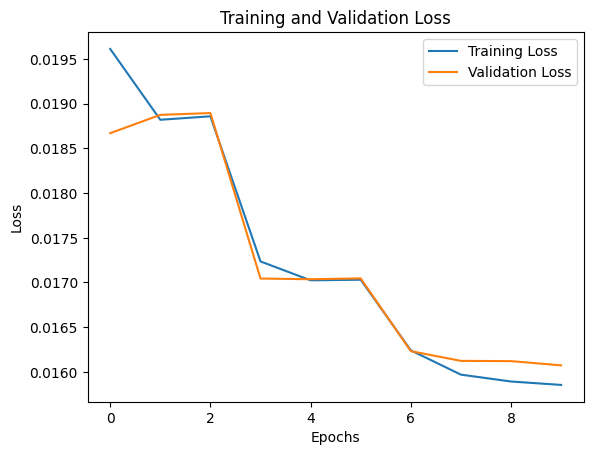

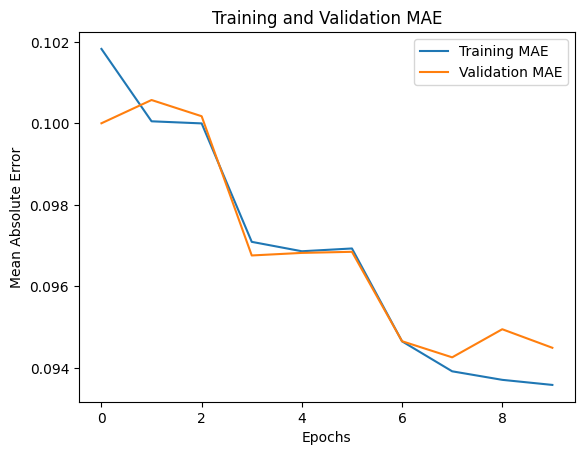

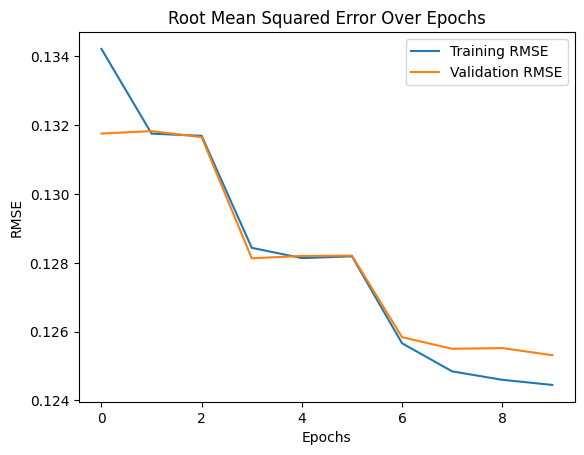

In [45]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot MAE
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

# Plot RMSE
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.title('Root Mean Squared Error Over Epochs')
plt.show()


Based on the images and model code, the model seems to be performing well in terms of both training and validation performance:
- **Training and Validation Loss**:
    - The training loss and validation loss both decrease over the epochs, indicating that the model is learning effectively and generalizing well to the validation data.
    - The training loss and validation loss are close to each other, suggesting that the model is not overfitting to the training data.

- **Training and Validation (MAE)**:
    - The training Mean Absolute Error (MAE) and validation MAE both decrease over the epochs.
    - The training MAE and validation MAE are also close to each other, further indicating that the model is not overfitting.

- **Root Mean Squared Error (RMSE)**:
    - The training RMSE and validation RMSE (orange line) both decrease over the epochs.
    - The training RMSE and validation RMSE are close to each other, confirming the model's good generalization performance.

In [46]:
# Evaluate on the test dataset
test_loss, test_mae, test_rmse = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error: {test_mae:.4f}")
print(f"Test Root Mean Squared Error: {test_rmse:.4f}")


9503/9503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0161 - mean_absolute_error: 0.0945 - root_mean_squared_error: 0.1255
Test Loss: 0.0161
Test Mean Absolute Error: 0.0945
Test Root Mean Squared Error: 0.1254


- **Test Loss: 0.0161**
    - The test loss represents the model's performance on the unseen test data.
    - A low test loss, such as 0.0164, indicates that the model is making accurate predictions on the test set.

- **Test Mean Absolute Error (MAE): 0.0945**
    - The MAE measures the average absolute difference between the predicted and actual ratings.
    - A low MAE, like 0.0946, suggests that the model's predictions are close to the true ratings on average.

- **Test Root Mean Squared Error (RMSE): 0.1254**
    - RMSE is the square root of the mean squared error (MSE), which measures the average squared difference between predicted and actual ratings.
    - RMSE gives a higher penalty to larger errors compared to MAE, making it more sensitive to outliers.
    - A low RMSE, such as 0.1265, indicates that the model is making accurate predictions with relatively small errors.

#### Prepare Data for Prediction

In [47]:
user_id = 1291085  # Replace with the target user_id
anime_ids = user_rating['anime_id'].unique()  # All anime IDs in the dataset

# Create a DataFrame with all possible (user_id, anime_id) pairs for this user
user_anime_pairs = pd.DataFrame({'user_id': [user_id] * len(anime_ids), 'anime_id': anime_ids})


#### Predict Ratings

In [48]:
# Convert the DataFrame into TensorFlow-compatible format
user_anime_tensor = {
    'user_id': tf.constant(user_anime_pairs['user_id']),
    'anime_id': tf.constant(user_anime_pairs['anime_id']),
}

# Predict ratings
predicted_ratings = model.predict(user_anime_tensor)

# Add predictions to the DataFrame
user_anime_pairs['predicted_rating'] = predicted_ratings


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


#### Merge with Anime Titles

In [49]:

# Merge recommendations with anime details to include Genre
recommendations = user_anime_pairs.merge(
    anime[['anime_id', 'Name', 'Genres']].drop_duplicates(),
    on='anime_id',
    how='left'
)

recommendations['predicted_rating'] = (recommendations['predicted_rating'] * 10).round()

# Sort by predicted rating (descending) to show top recommendations
recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)

# Identify watched anime for the specific user
watched_anime = user_rating[user_rating['user_id'] == user_id].merge(
    anime[['anime_id', 'Name', 'Genres']].drop_duplicates(),
    on='anime_id',
    how='left'
)
watched_anime = watched_anime.sort_values(by='rating', ascending=False)


In [50]:
from tabulate import tabulate  # Import tabulate for better table display

# Display top 20 anime rated by the user
top_watched_anime = watched_anime.head(20)

# Select the required columns
columns_to_display = ['Name', 'Genres', 'rating']

# Print the DataFrame in a table format
print("\nTop 20 Anime Rated by the User:")
print(tabulate(top_watched_anime[columns_to_display], headers=columns_to_display, tablefmt='pretty', showindex=False))



Top 20 Anime Rated by the User:
+----------------------------------------------------------+----------------------------------------------+--------+
|                           Name                           |                    Genres                    | rating |
+----------------------------------------------------------+----------------------------------------------+--------+
|               Yowamushi Pedal: Grande Road               |                    Sports                    |   10   |
| Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. |             Drama, Supernatural              |   10   |
|                   Ano Natsu de Matteru                   |            Drama, Romance, Sci-Fi            |   10   |
|                   Clannad: After Story                   |         Drama, Romance, Supernatural         |   10   |
|                        Haikyuu!!                         |                    Sports                    |   10   |
|             Code Geass: Hangy

In [51]:
from tabulate import tabulate  # Import tabulate for better table display

# Display top 10 recommendations
top_recommendations = recommendations.head(10)

# Select the required columns
columns_to_display = ['Name', 'Genres', 'predicted_rating']

# Print the DataFrame in a table format
print("Top 10 Recommended Anime:")
print(tabulate(top_recommendations[columns_to_display], headers=columns_to_display, tablefmt='pretty', showindex=False))


Top 10 Recommended Anime:
+-------------------------------------------------------------------------------------------------+---------------------------------------+------------------+
|                                              Name                                               |                Genres                 | predicted_rating |
+-------------------------------------------------------------------------------------------------+---------------------------------------+------------------+
|                                         Vampire Knight                                          | Drama, Mystery, Romance, Supernatural |       9.0        |
|                                            Cambrian                                             |                Hentai                 |       9.0        |
| Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie 2: UFO Shuurai! Tornado Daisakusen!! |        Action, Comedy, Mystery        |       9.0        |
|                   